#### The dataset is in the following directory structure

- `train/<class>/<image-name>.jpg`
- `test/<class>/<image-name>.jpg`

In [49]:
import numpy as np
import pandas as pd
import os

train_dir = "cifake-real-and-ai-generated-synthetic-images/train"
test_dir = "cifake-real-and-ai-generated-synthetic-images/test"

In [63]:
def get_image_details(folder):
    
    data = []
    classes = os.listdir(train_dir)
    for class_name in classes:
        class_dir = os.path.join(train_dir, class_name)
        images = os.listdir(class_dir)
        for img in images:
            img_path = f"{class_dir}/{img}"
            data.append([img, class_name, img_path])
            
    data_df = pd.DataFrame(data, columns=['image_name', 'label', 'image_path'])
    print(f"{len(data_df)} total images found..." )
    
    return data_df

In [97]:
import matplotlib.pyplot as plt
def show_sample_images(df):
    
    n_samples = 15
    sample_df = df.sample(n_samples)
    
    img_paths = sample_df['image_path'].values
    img_classes = sample_df['label'].values

    plt.figure(figsize= (4,4))
    for i in range(0, n_samples):
        # create a subplot grid
        plt.subplot(3, 5, i + 1)
        img = plt.imread(img_paths[i])
        plt.imshow(img)
        plt.axis('off')
        plt.title(img_classes[i])
        
    plt.show()

#### Training Data

In [98]:
train_data = get_image_details(train_dir)
train_data[['image_name', 'label']].head()

100000 total images found...


,image_name,label
0,5387 (6).jpg,FAKE
1,4093 (7).jpg,FAKE
2,5357 (8).jpg,FAKE
3,3825 (3).jpg,FAKE
4,4131 (5).jpg,FAKE


In [99]:
train_data['label'].value_counts()

label
FAKE    50000
REAL    50000
Name: count, dtype: int64

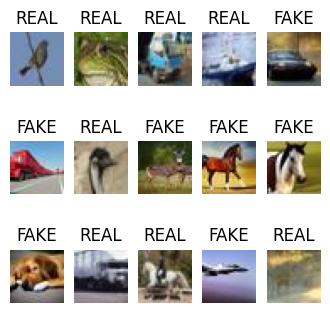

In [100]:
show_sample_images(train_data)

#### Test data

In [101]:
test_data = get_image_details(test_dir)

100000 total images found...


In [102]:
test_data['label'].value_counts()

label
FAKE    50000
REAL    50000
Name: count, dtype: int64

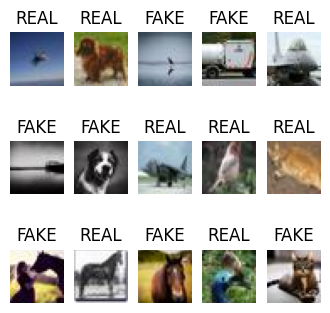

In [103]:
show_sample_images(test_data)